In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
from scipy.signal import freqz
%matplotlib inline

from ipywidgets import interact, Dropdown, IntSlider
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import scipy

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
audio_data = pd.read_csv("audio_features.csv")
metadata_df = pd.read_csv("metadata.csv")
all_data = pd.read_csv("all_features.csv")

In [11]:
metadata_df.head(25)

,Unnamed: 0,case,run,VB,time,DOC,feed,material
0,NaN,1.0,1.0,0.0,2.0,1.50,0.5,1.0
1,NaN,1.0,2.0,NaN,4.0,1.50,0.5,1.0
2,NaN,1.0,3.0,NaN,6.0,1.50,0.5,1.0
3,NaN,1.0,4.0,11.0,7.0,1.50,0.5,1.0
4,NaN,1.0,5.0,NaN,11.0,1.50,0.5,1.0
5,NaN,1.0,6.0,20.0,15.0,1.50,0.5,1.0
6,NaN,1.0,7.0,24.0,19.0,1.50,0.5,1.0
7,NaN,1.0,8.0,29.0,22.0,1.50,0.5,1.0
8,NaN,1.0,9.0,28.0,26.0,1.50,0.5,1.0
9,NaN,1.0,10.0,29.0,29.0,1.50,0.5,1.0


In [5]:
display(all_data.head())
display(metadata_df.head())

,smcAC_case001,smcDC_case001,vib_table_case001,vib_spindle_case001,AE_table_case001,AE_spindle_case001,smcAC_case002,smcDC_case002,vib_table_case002,vib_spindle_case002,...,AE_table_case164,AE_spindle_case164,smcAC_case165,smcDC_case165,vib_table_case165,vib_spindle_case165,AE_table_case165,AE_spindle_case165,smcAC_case166,smcDC_case166
0,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760,0.307617,0.668945,0.075684,0.301514,...,0.114746,0.139771,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798,-0.205078,1.381836
1,0.263672,0.810547,0.085449,0.301514,0.098267,0.123291,0.312500,0.678711,0.080566,0.308838,...,0.095215,0.112305,0.244141,1.333008,0.058594,0.279541,0.121460,0.140381,-0.239258,1.386719
2,0.207520,0.781250,0.078125,0.303955,0.092163,0.104980,0.195312,0.859375,0.078125,0.299072,...,0.101929,0.120239,0.205078,1.333008,0.058594,0.285645,0.122070,0.142822,-0.156250,1.386719
3,0.302734,0.849609,0.073242,0.300293,0.095215,0.111084,0.187988,1.123047,0.080566,0.306396,...,0.098877,0.118408,0.156250,1.333008,0.063477,0.286865,0.119019,0.139160,0.126953,1.381836
4,0.239258,1.098633,0.083008,0.299072,0.083008,0.092163,-0.009766,1.166992,0.075684,0.319824,...,0.098877,0.120239,0.048828,1.337891,0.058594,0.286865,0.114136,0.132446,0.200195,1.376953


,Unnamed: 0,case,run,VB,time,DOC,feed,material
0,NaN,1.0,1.0,0.0,2.0,1.5,0.5,1.0
1,NaN,1.0,2.0,NaN,4.0,1.5,0.5,1.0
2,NaN,1.0,3.0,NaN,6.0,1.5,0.5,1.0
3,NaN,1.0,4.0,11.0,7.0,1.5,0.5,1.0
4,NaN,1.0,5.0,NaN,11.0,1.5,0.5,1.0


In [ ]:
signal = audio_data["AE_spindle_case001"] 

In [44]:
filters = ({"name":"rect", "function":np.ones}, {"name":"hanning", "function":np.hanning}, {"name":"kaiser", "function":np.kaiser})

def sTFT(time_seg, filter_index, case_number, signal_location, category=None):
    signal_location_dict = {0: "spindle", 1: "table"}
    loc_str = signal_location_dict[signal_location]
    case_str = str(case_number).zfill(3)
    signal = audio_data[f"AE_{loc_str}_case{case_str}"]
    
    Nwindow = N // time_seg
    time_freq_image = np.zeros((N // 2, time_seg))

    for time_index in range(time_seg):
        signal_pad = np.zeros(N)
        window = filters[filter_index]["function"](Nwindow) if filter_index < 2 else filters[filter_index]["function"](Nwindow, 10)
        segment = signal[time_index * Nwindow:(time_index + 1) * Nwindow] * window
        signal_pad[:Nwindow] = segment
        signal_freq = np.fft.fft(signal_pad)[:N // 2]
        signal_freq_max = np.max(np.abs(signal_freq))
        signal_freq = np.abs(signal_freq) / signal_freq_max
        time_freq_image[:, time_index] = 20 * np.log10(signal_freq)

    w, h = plt.figaspect(0.4)
    plt.figure(figsize=(w, h))
    plt.imshow(time_freq_image[::-1, :], cmap="gray", extent=(0, N / fs * 1000, 0, fs // 2), aspect='auto', clim=(-60, 0))
    
    title = f"Time-Frequency Analysis — Case {case_str} ({loc_str.capitalize()})"
    if category:
        title += f" — {category}"
    
    plt.title(title)
    plt.xlabel("Time (ms)")
    plt.ylabel("Frequency (Hz)")
    plt.show()


# Analyze STFT of Each Label

In [ ]:

bins = [0, 20, 40, 70, 100, 150, 1_000]
labels = ["Good", "Slight", "Average", "Heavy", "Severe", "Failure"]

labels = pd.cut(metadata_df["VB"], bins=bins, labels=labels)

label_dict = {"Good": [], "Slight": [], "Average": [], "Heavy": [], "Severe": [], "Failure": []}

for label in label_dict:
    label_dict[label] = labels[labels==label].index + 1
    

label_dict

{'Good': Index([  4,   6,  18,  19,  20,  21,  22,  24,  33,  34,  35,  36,  37,  46,
         47,  48,  54,  55,  56,  63,  64,  65,  73,  74,  75,  76,  77,  79,
         80,  81,  82,  96,  97,  99, 100, 101, 111, 118, 119, 126, 133, 134,
        135, 147, 148, 156],
       dtype='int64'),
 'Slight': Index([  7,   8,   9,  10,  11,  12,  25,  26,  27,  28,  38,  39,  40,  41,
         42,  43,  49,  50,  51,  57,  58,  66,  67,  83,  84,  86,  87, 102,
        103, 105, 112, 120, 121, 122, 127, 136, 137, 149, 151, 157, 158, 164,
        166],
       dtype='int64'),
 'Average': Index([ 13,  14,  15,  17,  29,  30,  31,  44,  45,  52,  59,  60,  68,  69,
         70,  71,  89,  90,  91,  92,  93, 106, 107, 108, 109, 113, 114, 123,
        129, 130, 138, 139, 140, 152, 159, 160, 161, 167],
       dtype='int64'),
 'Heavy': Index([61, 94, 115, 141, 142, 153], dtype='int64'),
 'Severe': Index([143, 144, 154], dtype='int64'),
 'Failure': Index([145], dtype='int64')}

Important Notes: <br>
* There are 2 different speeds.
* There are 2 different cutting materials.

In [46]:
col_name = "AE_table_case001"
time_seg = 2
filter_index = 2
signal = audio_data[col_name].values
N = len(signal)
Nwindow = N // time_seg
time_freq_image = np.zeros((N // 2, time_seg))
fs = 250

spectrums = []

for time_index in range(time_seg):
    signal_pad = np.zeros(N)
    if filter_index < 2:
        window = filters[filter_index]["function"](Nwindow)
    else:
        window = filters[filter_index]["function"](Nwindow, 10)
    segment = signal[time_index * Nwindow:(time_index + 1) * Nwindow] * window
    signal_pad[:Nwindow] = segment
    signal_freq = np.fft.fft(signal_pad)[:N // 2]
    signal_freq_max = np.max(np.abs(signal_freq))
    signal_freq = np.abs(signal_freq) / signal_freq_max
    time_freq_image[:, time_index] = 20 * np.log10(signal_freq)

    print(time_freq_image)

[[  0.           0.        ]
 [ -0.83860648   0.        ]
 [ -3.38120735   0.        ]
 ...
 [-61.98040542   0.        ]
 [-61.66986878   0.        ]
 [-61.12425159   0.        ]]
[[  0.           0.        ]
 [ -0.83860648  -0.90164208]
 [ -3.38120735  -3.65451356]
 ...
 [-61.98040542 -65.66571249]
 [-61.66986878 -69.86007702]
 [-61.12425159 -73.54143617]]


In [ ]:
def sTFT(time_seg, filter_index, case_number, sensor_type, category):
    case_str = str(case_number).zfill(3)
    col_name = f"{sensor_type}_case{case_str}"

    case_metadata = metadata_df.loc[case_number - 1]
    time = case_metadata["time"]
    doc = case_metadata["DOC"]
    feed = case_metadata["feed"]
    material = case_metadata["material"]

    if col_name not in all_data.columns:
        print(f"{col_name} not found in data.")
        return

    signal = all_data[col_name].values
    N = len(signal)
    Nwindow = N // time_seg
    time_freq_image = np.zeros((N // 2, time_seg))

    for time_index in range(time_seg):
        signal_pad = np.zeros(N)
        if filter_index < 2:
            window = filters[filter_index]["function"](Nwindow)
        else:
            window = filters[filter_index]["function"](Nwindow, 10)
        segment = signal[time_index * Nwindow:(time_index + 1) * Nwindow] * window
        signal_pad[:Nwindow] = segment
        signal_freq = np.fft.fft(signal_pad)[:N // 2]
        signal_freq_max = np.max(np.abs(signal_freq))
        signal_freq = np.abs(signal_freq) / signal_freq_max
        time_freq_image[:, time_index] = 20 * np.log10(signal_freq)

    w, h = plt.figaspect(0.4)
    plt.figure(figsize=(w, h))
    plt.imshow(time_freq_image[::-1, :], cmap="gray", extent=(0, N / fs * 1000, 0, fs // 2), aspect='auto', clim=(-60, 0))
    plt.title(f"{category} — Case {case_str} ({sensor_type}) {filters[filter_index]['name']} window, window size = {Nwindow}, time = {time}, doc = {doc}, feed = {feed}, material = {material}")
    plt.xlabel("Time (ms)")
    plt.ylabel("Frequency (Hz)")

    plt.show()

In [48]:
def create_category_plotter(category_name, labels_dict):
    valid_cases = sorted(labels_dict[category_name])
    sensor_options = ["AE_spindle", "AE_table", "vib_spindle", "vib_table", "smcAC", "smcDC"]
    
    interact(
        sTFT,
        time_seg=IntSlider(min=1, max=50, step=1, value=10),
        filter_index=IntSlider(min=0, max=2, step=1, value=0),
        case_number=Dropdown(options=valid_cases, description="Case #"),
        sensor_type=Dropdown(options=sensor_options, description="Sensor"),
        category=widgets.fixed(category_name)
    )

# Create one interactive plotter per category
for category in label_dict.keys():
    print(f"\n⏬ {category} category visualization")
    create_category_plotter(category, label_dict)


⏬ Good category visualization


interactive(children=(IntSlider(value=10, description='time_seg', max=50, min=1), IntSlider(value=0, descripti…


⏬ Slight category visualization


interactive(children=(IntSlider(value=10, description='time_seg', max=50, min=1), IntSlider(value=0, descripti…


⏬ Average category visualization


interactive(children=(IntSlider(value=10, description='time_seg', max=50, min=1), IntSlider(value=0, descripti…


⏬ Heavy category visualization


interactive(children=(IntSlider(value=10, description='time_seg', max=50, min=1), IntSlider(value=0, descripti…


⏬ Severe category visualization


interactive(children=(IntSlider(value=10, description='time_seg', max=50, min=1), IntSlider(value=0, descripti…


⏬ Failure category visualization


interactive(children=(IntSlider(value=10, description='time_seg', max=50, min=1), IntSlider(value=0, descripti…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def classify_signal_from_stft(case_number, sensor_type, time_seg, filter_index):
    case_str = str(case_number).zfill(3)
    col_name = f"{sensor_type}_case{case_str}"
    
    if col_name not in all_data.columns:
        print(f"{col_name} not found.")
        return None

    signal = all_data[col_name].values
    N = len(signal)
    fs = 250
    Nwindow = N // time_seg
    time_freq_image = np.zeros((N // 2, time_seg))

    for time_index in range(time_seg):
        signal_pad = np.zeros(N)
        if filter_index < 2:
            window = filters[filter_index]["function"](Nwindow)
        else:
            window = filters[filter_index]["function"](Nwindow, 10)
        segment = signal[time_index * Nwindow:(time_index + 1) * Nwindow] * window
        signal_pad[:Nwindow] = segment
        signal_freq = np.fft.fft(signal_pad)[:N // 2]
        signal_freq_max = np.max(np.abs(signal_freq))
        signal_freq = np.abs(signal_freq) / signal_freq_max
        time_freq_image[:, time_index] = 20 * np.log10(signal_freq)
    
    if sensor_type == "AE_spindle":
        band_ranges = {
        "low": (0, 30),
        "mid": (30, 90),
        "high": (90, 125)
        }

    elif sensor_type == "AE_table":
        band_ranges = {
        "low": (0, 30),
        "mid": (30, 90),
        "high": (90, 125)
        }

    elif sensor_type == "vib_spindle":
        band_ranges = {
        "low": (0, 30),
        "mid": (30, 90),
        "high": (90, 125)
        }

    elif sensor_type == "vib_table":
        band_ranges = {
        "low": (0, 20),
        "mid": (20, 90),
        "high": (90, 125)
        }

    elif sensor_type == "smcDC":
        band_ranges = {
        "low": (0, 2),
        "mid": (30, 90),
        "high": (90, 125)
        }

    elif sensor_type == "smcAC":
        band_ranges = {
        "low": (0, 10),
        "mid": (20, 80),
        "high": (80, 125)
        }
    
    freqs = np.linspace(0, fs / 2, N // 2)
    band_energies = {}

    for band, (f_low, f_high) in band_ranges.items():
        idx_band = np.where((freqs >= f_low) & (freqs < f_high))[0]
        energy = np.sum(10 ** (time_freq_image[idx_band, :] / 10)) 
        band_energies[band] = energy

    total_energy = sum(band_energies.values())
    band_ratios = {band: energy / total_energy for band, energy in band_energies.items()}

    return band_ratios


In [ ]:
# def my_policy(band_ratios):
#     r_low = band_ratios['low']
#     r_mid = band_ratios['mid']
#     r_high = band_ratios['high']
    
#     if r_high > 0.45:
#         return "Failure"
#     elif r_high > 0.35:
#         return "Severe"
#     elif r_high > 0.25:
#         return "Heavy"
#     elif r_mid > 0.4:
#         return "Average"
#     elif r_low > 0.6:
#         return "Good"
#     else:
#         return "Slight"


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def freq_box_plots(records, sensor_type, plotting_style):
    # Convert to DataFrame
    df = pd.DataFrame(records)


    if plotting_style == "standard":
        # Plot r_low
        plt.figure(figsize=(10, 4))
        sns.boxplot(x="label", y="r_low", data=df)
        plt.title(f"Low Frequency Energy Ratio (r_low) by Wear Category | Sensor Type: {sensor_type}")
        plt.ylabel("r_low")
        plt.xlabel("Wear Label")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot r_mid
        plt.figure(figsize=(10, 4))
        sns.boxplot(x="label", y="r_mid", data=df)
        plt.title(f"Mid Frequency Energy Ratio (r_mid) by Wear Category | Sensor Type: {sensor_type}")
        plt.ylabel("r_mid")
        plt.xlabel("Wear Label")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot r_high
        plt.figure(figsize=(10, 4))
        sns.boxplot(x="label", y="r_high", data=df)
        plt.title(f"High Frequency Energy Ratio (r_high) by Wear Category | Sensor Type: {sensor_type}")
        plt.ylabel("r_high")
        plt.xlabel("Wear Label")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    elif plotting_style == "log":
        # Plot r_low
        plt.figure(figsize=(10, 5))
        sns.boxplot(x="label", y=np.log10(df['r_low']), data=df, hue="label", dodge=False)
        plt.title(f"Log-Scaled Low Frequency Energy Ratio (r_low) by Wear Category | Sensor Type: {sensor_type}")
        plt.ylabel("log10(r_low)")
        plt.xlabel("Wear Label")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Test
        plt.figure(figsize=(10, 5))
        sns.boxplot(x="label", y=np.log10(df['r_mid']), data=df, hue="label", dodge=False)
        plt.title(f"Log-Scaled Mid Frequency Energy Ratio (r_mid) by Wear Category | Sensor Type: {sensor_type}")
        plt.ylabel("log10(r_mid)")
        plt.xlabel("Wear Label")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot r_high
        plt.figure(figsize=(10, 5))
        sns.boxplot(x="label", y=np.log10(df['r_high']), data=df, hue="label", dodge=False)
        plt.title(f"Log-Scaled High Frequency Energy Ratio (r_high) by Wear Category | Sensor Type: {sensor_type}")
        plt.ylabel("log10(r_high)")
        plt.xlabel("Wear Label")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Analyze Different Bands for different sensor types. <br>
Can I normalize the frequencies so they have different mean and stdev. This will allow us to see differences more clearly despite sensors having different scales. <br>

# Extract Energy Features


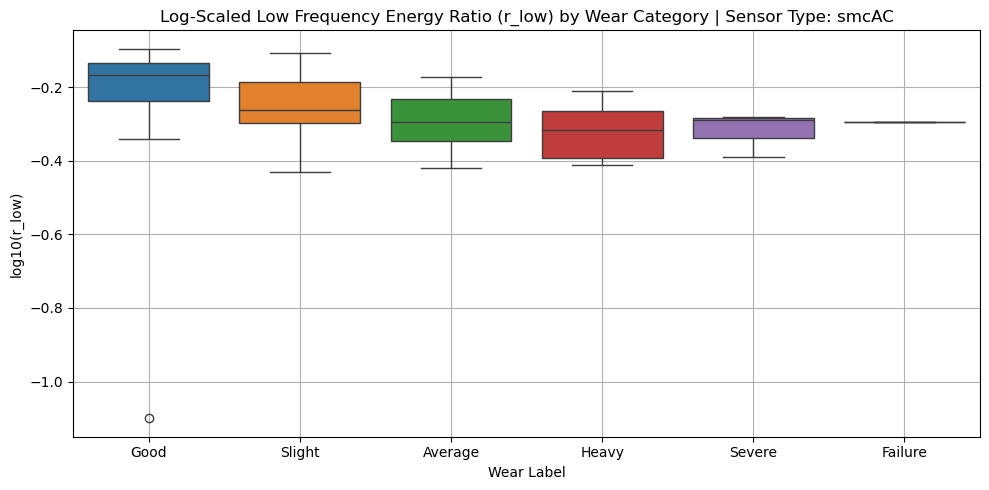

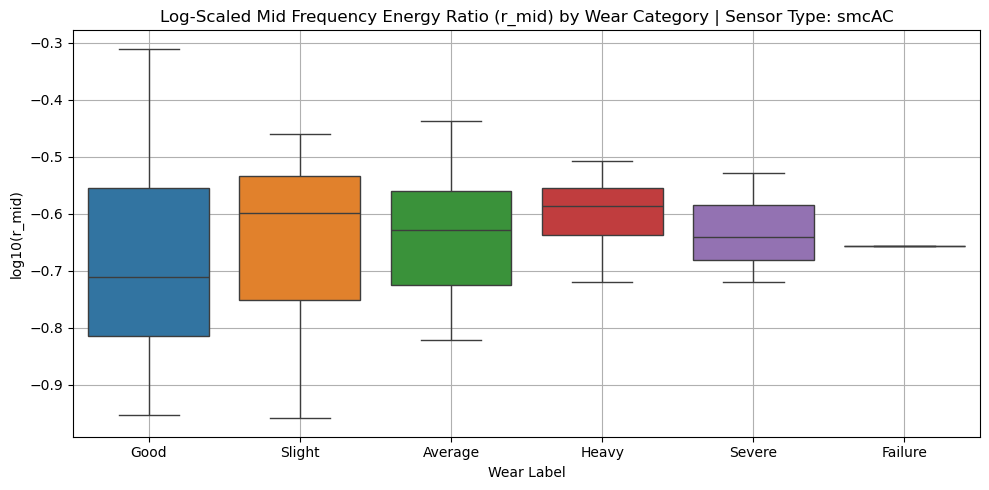

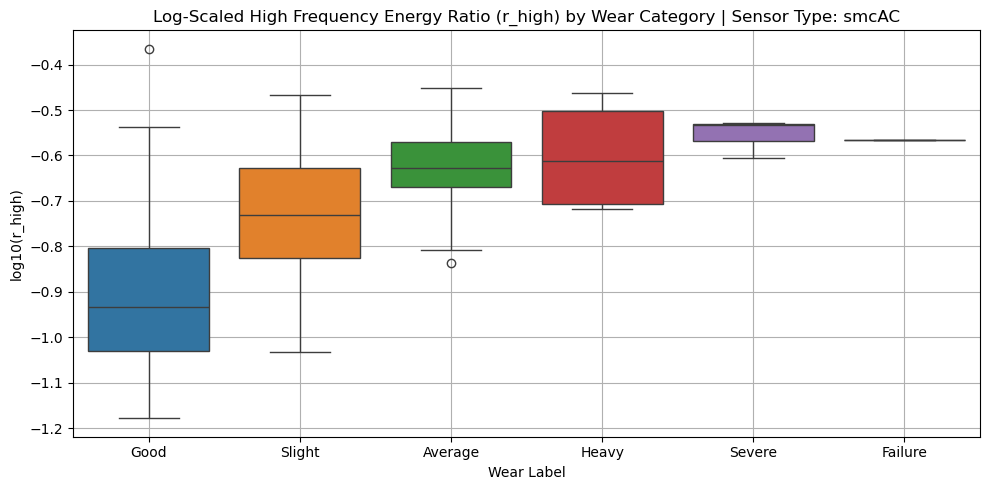

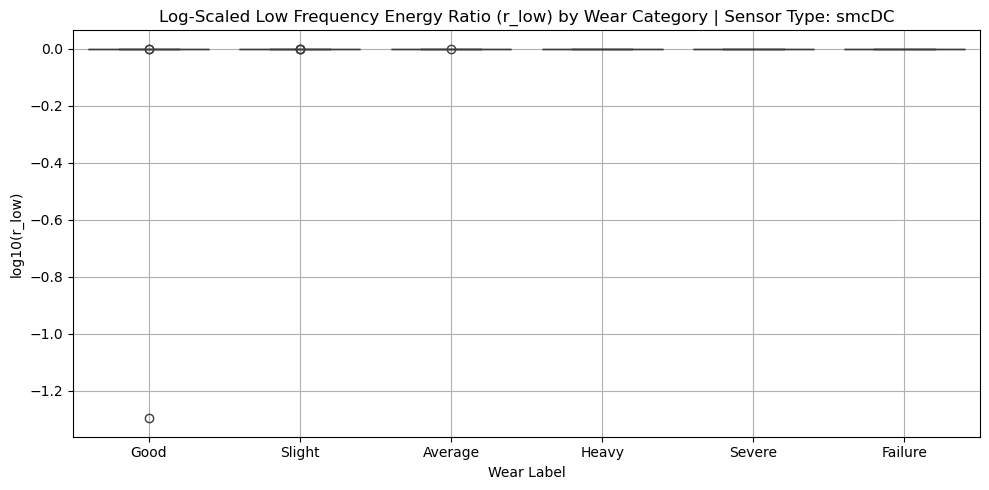

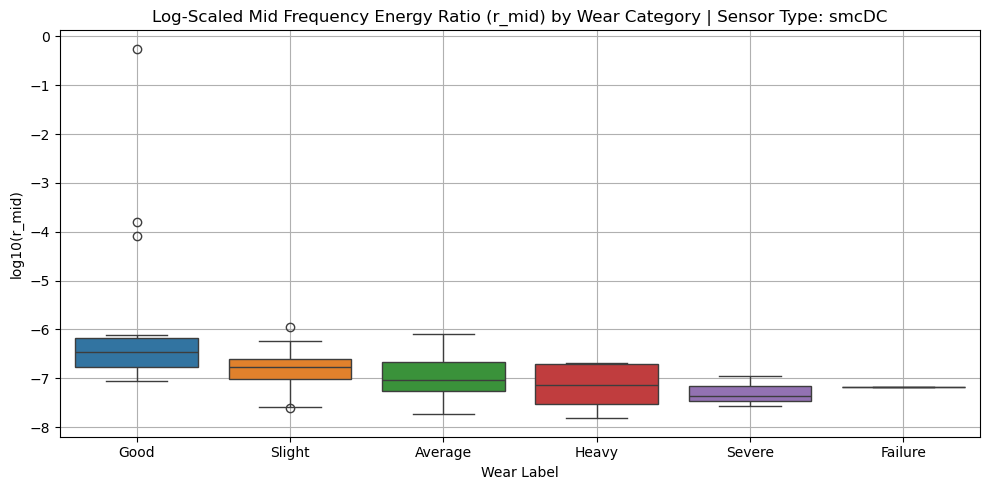

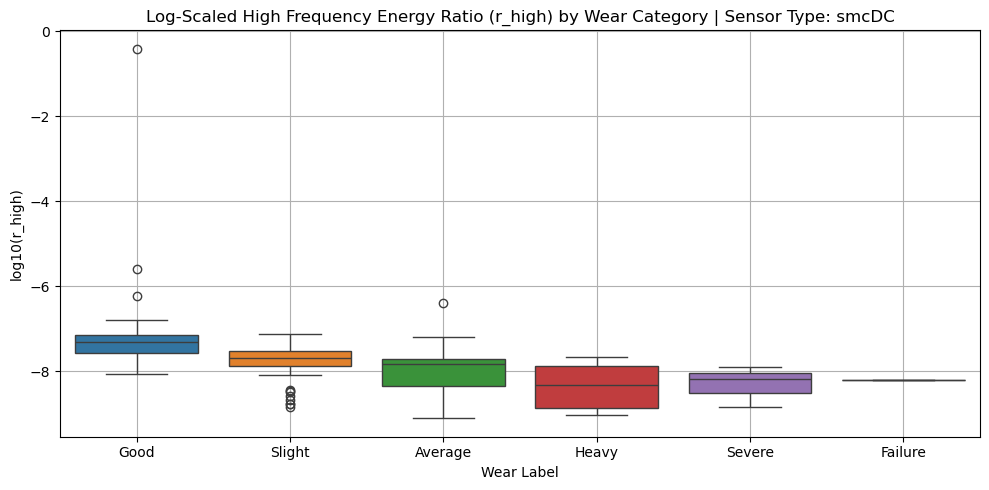

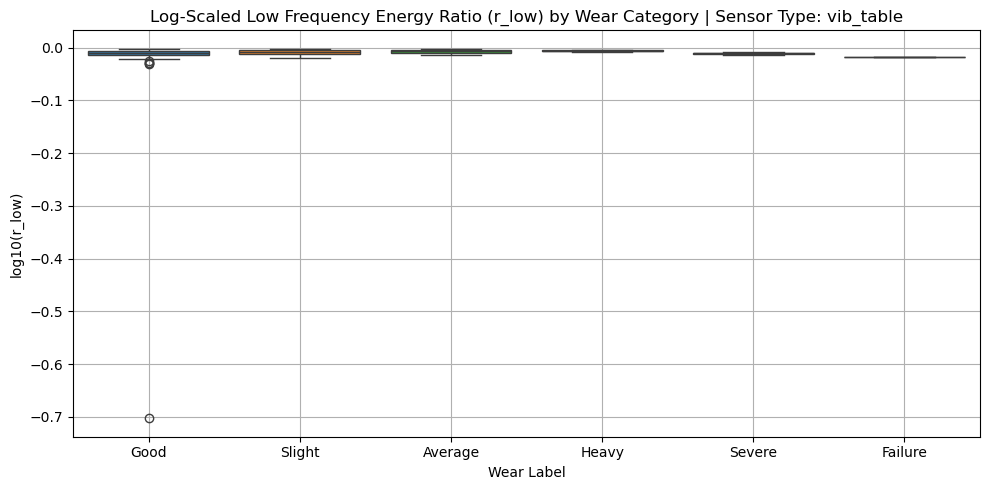

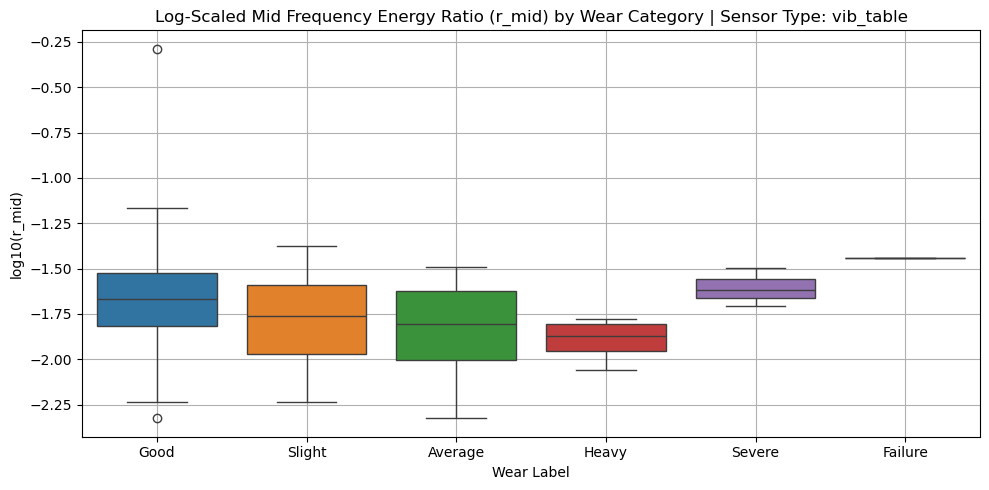

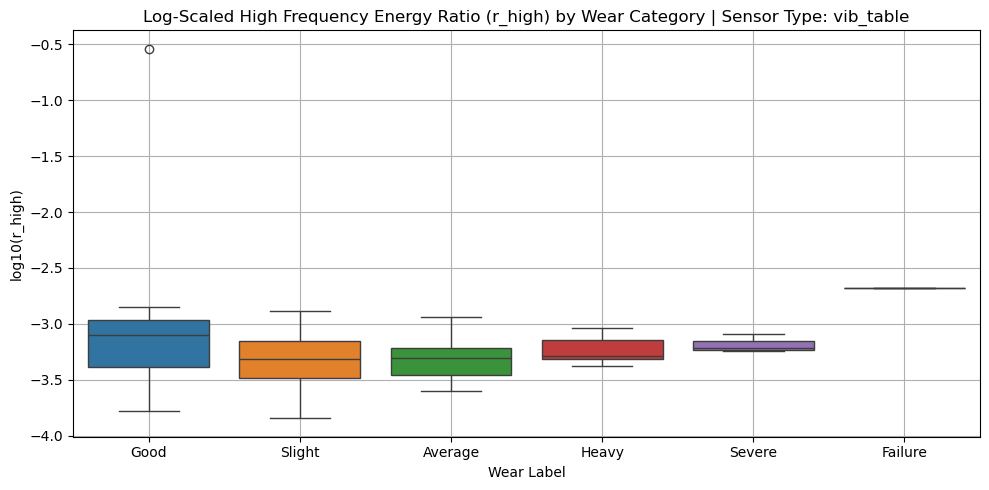

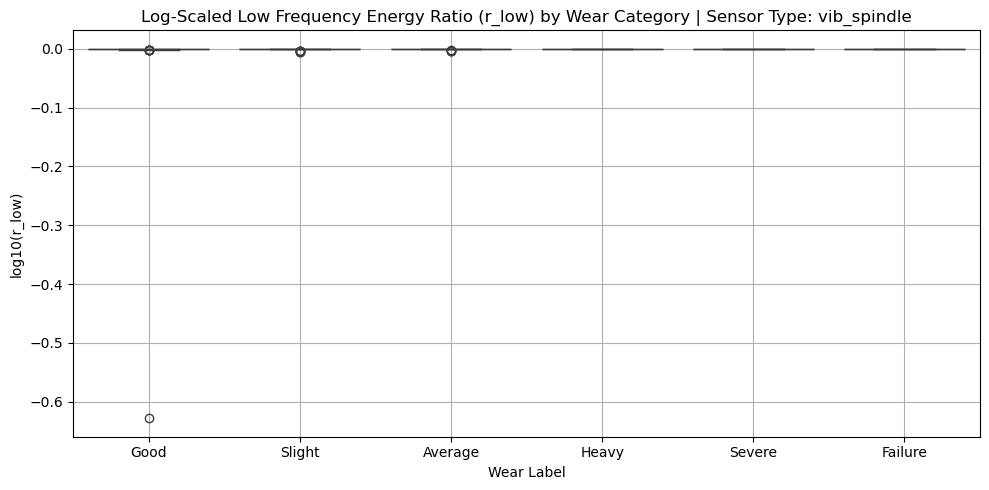

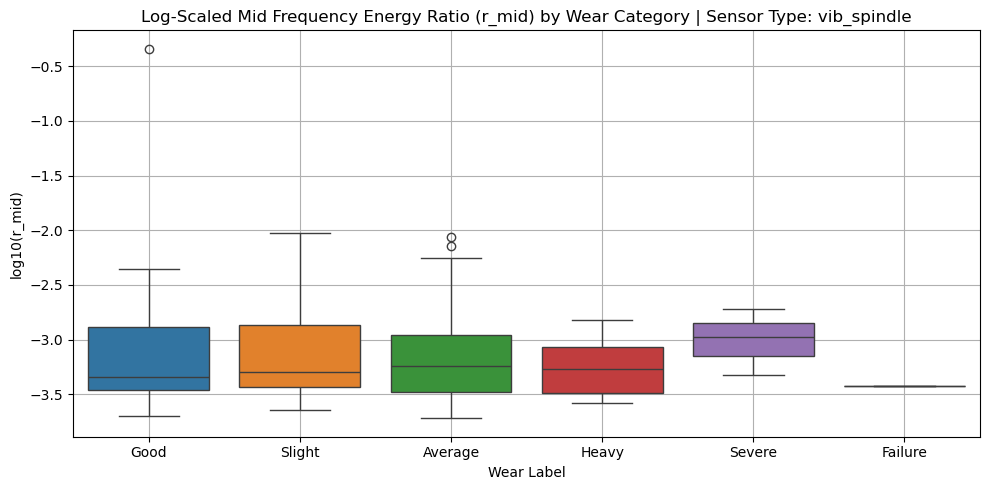

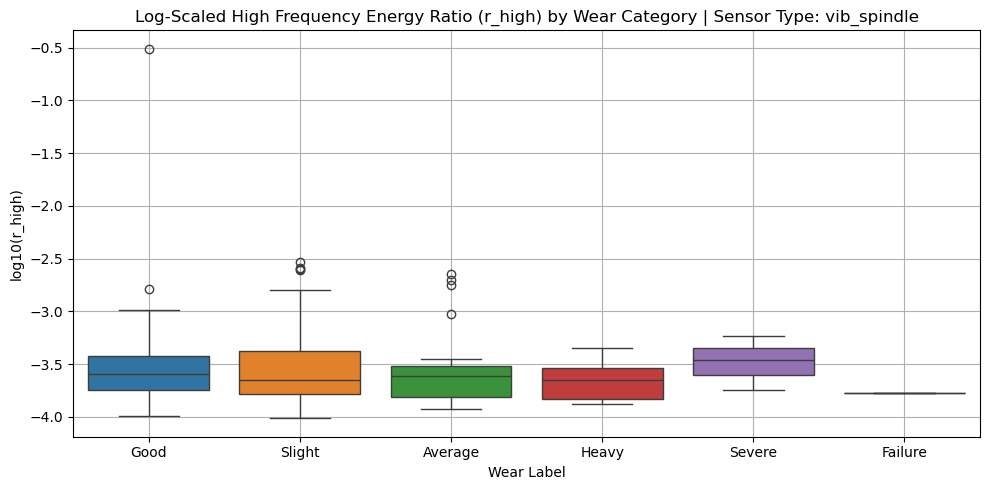

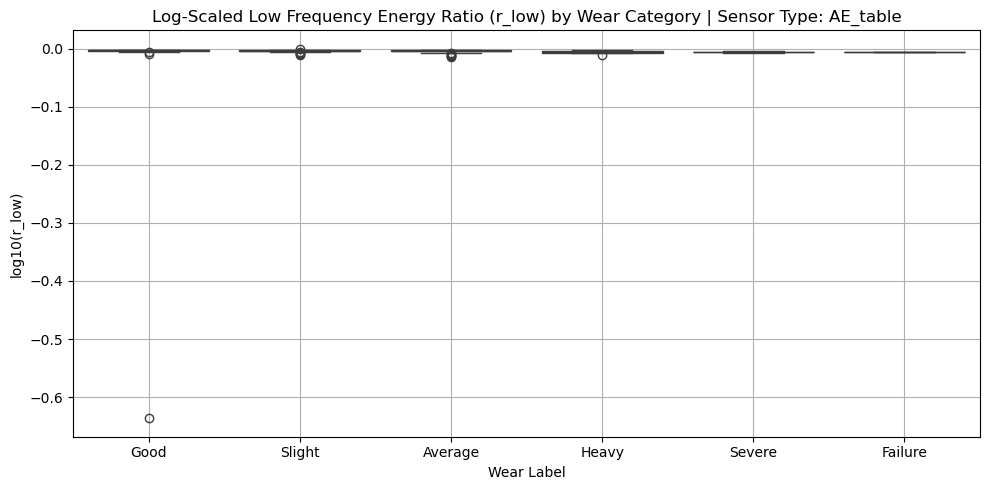

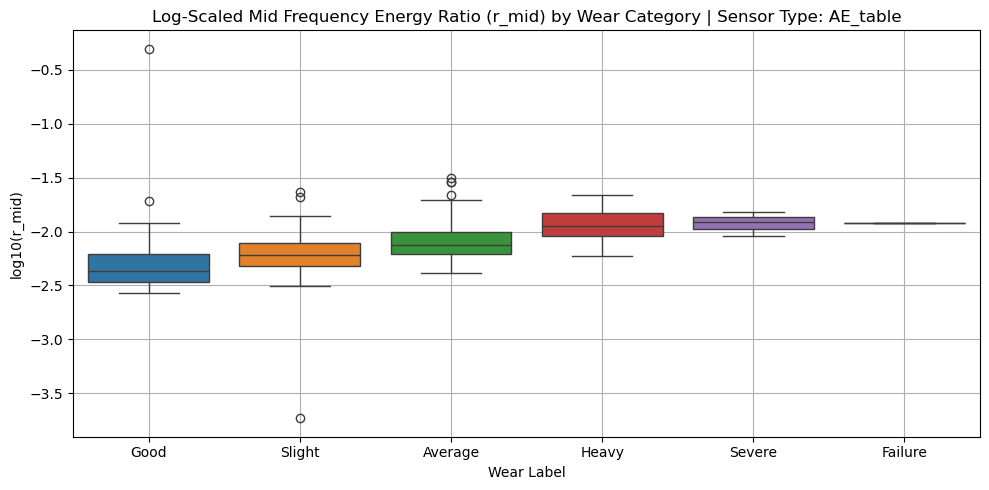

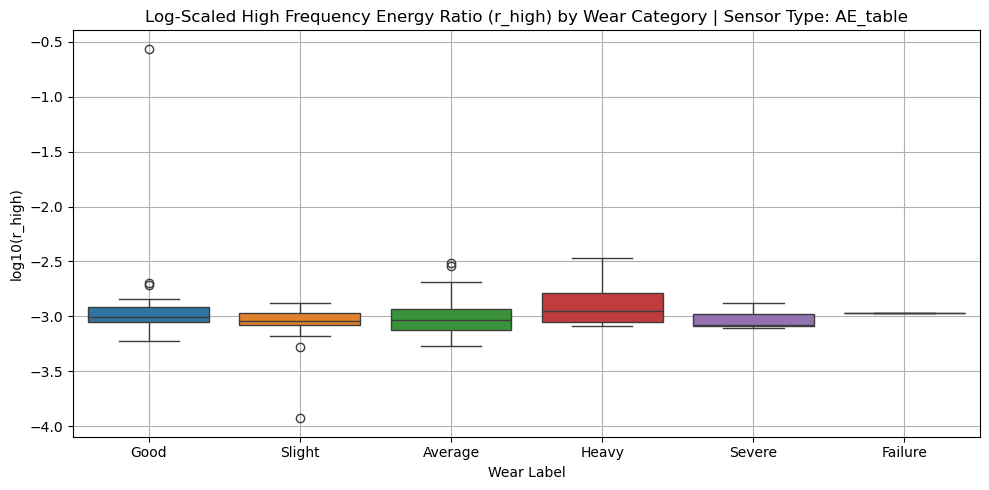

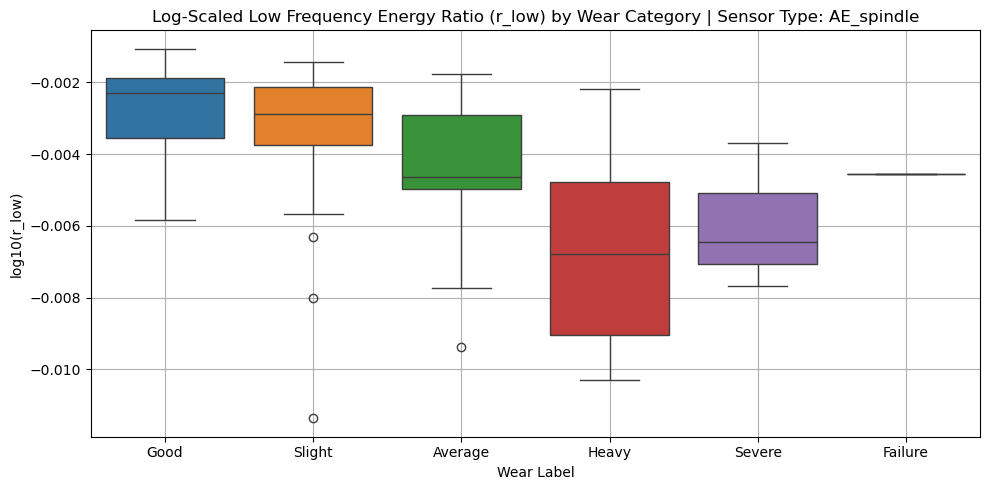

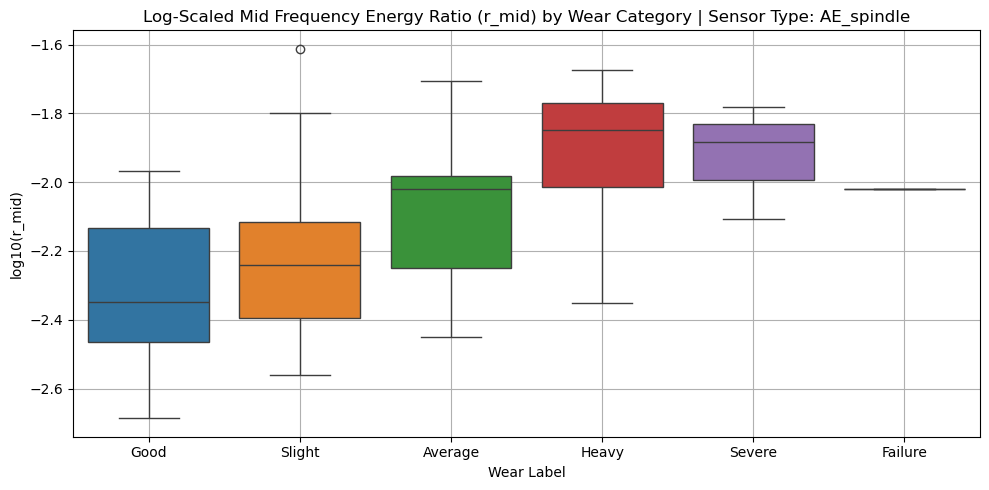

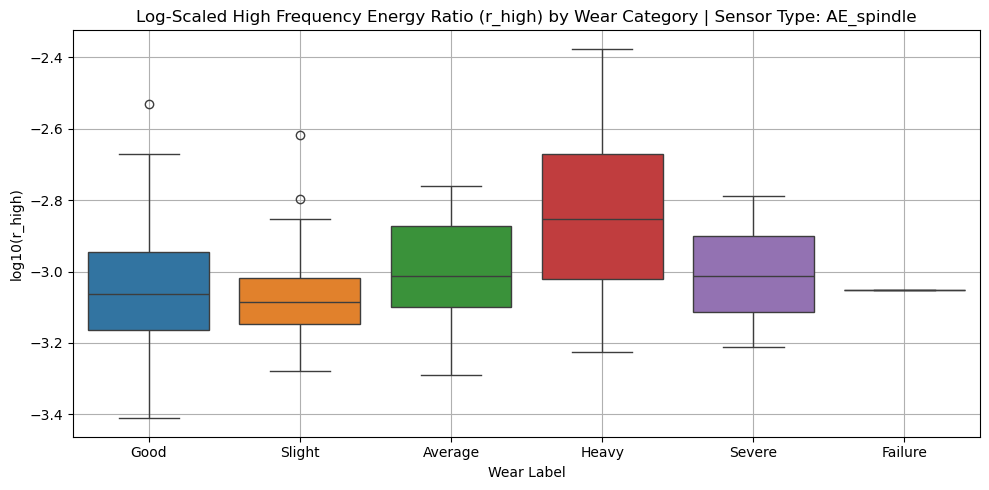

In [ ]:
records = []
sensor_type_list = ["smcAC", "smcDC", "vib_table", "vib_spindle", "AE_table", "AE_spindle"]
# plotting_style = "standard"
plotting_style = "log"
band_ratios_dict = {}

for sensor_type in sensor_type_list:
    records = []
    for label in label_dict.keys():
        # print("Label", label)
        for case in label_dict[label]:
            case_str = str(case).zfill(3)

            column = sensor_type + "_case" + case_str

            if column in all_data.columns:
                band_ratios = classify_signal_from_stft(
                    case_number=case,
                    sensor_type=sensor_type,
                    time_seg=2,
                    filter_index=2,
                    # policy_function=my_policy
                )
            
            records.append({"label": label, "r_low": band_ratios["low"], "r_mid": band_ratios["mid"], "r_high": band_ratios["high"]})
            band_ratios_dict[column] = band_ratios

    # Plot for each sensor type
    freq_box_plots(records, sensor_type, plotting_style)
    

In [53]:
band_ratios_df = pd.DataFrame(band_ratios_dict)
band_ratios_df

,smcAC_case004,smcAC_case006,smcAC_case018,smcAC_case019,smcAC_case020,smcAC_case021,smcAC_case022,smcAC_case024,smcAC_case033,smcAC_case034,...,AE_spindle_case061,AE_spindle_case094,AE_spindle_case115,AE_spindle_case141,AE_spindle_case142,AE_spindle_case153,AE_spindle_case143,AE_spindle_case144,AE_spindle_case154,AE_spindle_case145
low,0.504238,0.479404,0.079464,0.723055,0.743388,0.708949,0.686289,0.649120,0.750871,0.753000,...,0.990075,0.982909,0.978213,0.994956,0.986061,0.976575,0.982448,0.991546,0.985239,0.989590
mid,0.381392,0.339611,0.489508,0.138033,0.125232,0.133398,0.153098,0.166706,0.182681,0.176563,...,0.008762,0.015397,0.017579,0.004449,0.013044,0.021127,0.016583,0.007840,0.013131,0.009524
high,0.114370,0.180984,0.431027,0.138911,0.131381,0.157652,0.160612,0.184174,0.066448,0.070437,...,0.001164,0.001693,0.004208,0.000595,0.000895,0.002297,0.000969,0.000614,0.001631,0.000886


In [ ]:
# import pandas as pd
# import re

# # Sample column names
# columns = band_ratios_df.columns

# # Extract case numbers
# case_map = {col: int(re.search(r'case(\d+)', col).group(1)) for col in columns if "case" in col}

# # Example: {'smcAC_case004': 4, 'smcAC_case006': 6, ...}

In [55]:
from collections import defaultdict

grouped_by_case = defaultdict(list)

for col in band_ratios_df.columns:
    match = re.search(r'case(\d+)', col)
    if match:
        case_num = int(match.group(1))
        grouped_by_case[case_num].append(col)

In [56]:
grouped_by_case

defaultdict(list,
            {4: ['smcAC_case004',
              'smcDC_case004',
              'vib_table_case004',
              'vib_spindle_case004',
              'AE_table_case004',
              'AE_spindle_case004'],
             6: ['smcAC_case006',
              'smcDC_case006',
              'vib_table_case006',
              'vib_spindle_case006',
              'AE_table_case006',
              'AE_spindle_case006'],
             18: ['smcAC_case018',
              'smcDC_case018',
              'vib_table_case018',
              'vib_spindle_case018',
              'AE_table_case018',
              'AE_spindle_case018'],
             19: ['smcAC_case019',
              'smcDC_case019',
              'vib_table_case019',
              'vib_spindle_case019',
              'AE_table_case019',
              'AE_spindle_case019'],
             20: ['smcAC_case020',
              'smcDC_case020',
              'vib_table_case020',
              'vib_spindle_case020',
          

# Generate Statistical Features

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def stft_band_energies(case_number, sensor_type, time_seg, filter_index):
    case_str = str(case_number).zfill(3)
    col_name = f"{sensor_type}_case{case_str}"
    
    if col_name not in all_data.columns:
        print(f"{col_name} not found.")
        return None

    signal = all_data[col_name].values
    N = len(signal)
    fs = 250
    Nwindow = N // time_seg
    time_freq_image = np.zeros((N // 2, time_seg))

    for time_index in range(time_seg):
        signal_pad = np.zeros(N)
        if filter_index < 2:
            window = filters[filter_index]["function"](Nwindow)
        else:
            window = filters[filter_index]["function"](Nwindow, 10)
        segment = signal[time_index * Nwindow:(time_index + 1) * Nwindow] * window
        signal_pad[:Nwindow] = segment
        signal_freq = np.fft.fft(signal_pad)[:N // 2]
        signal_freq_max = np.max(np.abs(signal_freq))
        signal_freq = np.abs(signal_freq) / signal_freq_max
        time_freq_image[:, time_index] = 20 * np.log10(signal_freq)  # dB scale

    # Define band ranges by sensor type
    if sensor_type in ["AE_spindle", "AE_table", "vib_spindle"]:
        band_ranges = {"low": (0, 30), "mid": (30, 90), "high": (90, 125)}
    elif sensor_type == "vib_table":
        band_ranges = {"low": (0, 20), "mid": (20, 90), "high": (90, 125)}
    elif sensor_type == "smcDC":
        band_ranges = {"low": (0, 2), "mid": (30, 90), "high": (90, 125)}
    elif sensor_type == "smcAC":
        band_ranges = {"low": (0, 10), "mid": (20, 80), "high": (80, 125)}
    else:
        raise ValueError(f"Unknown sensor type: {sensor_type}")

    freqs = np.linspace(0, fs / 2, N // 2)
    band_energy_timeseries = {band: [] for band in band_ranges}

    for time_index in range(time_seg):
        for band, (f_low, f_high) in band_ranges.items():
            idx_band = np.where((freqs >= f_low) & (freqs < f_high))[0]
            segment_power = 10 ** (time_freq_image[idx_band, time_index] / 10)
            energy = np.sum(segment_power)
            band_energy_timeseries[band].append(energy)

    return band_energy_timeseries


In [ ]:
def remove_outliers_iqr(df, group_cols, feature_cols, iqr_thresh=1.5):
    filtered_df = df.copy()
    
    for feature in feature_cols:
        filtered = []

        for _, group in filtered_df.groupby(group_cols):
            Q1 = group[feature].quantile(0.25)
            Q3 = group[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - iqr_thresh * IQR
            upper = Q3 + iqr_thresh * IQR
            mask = (group[feature] >= lower) & (group[feature] <= upper)
            filtered.append(group[mask])

        filtered_df = pd.concat(filtered, axis=0)

    return filtered_df.reset_index(drop=True)


In [59]:
stats = []

for sensor_type in sensor_type_list:
    for label in label_dict.keys():
        for case in label_dict[label]:
            energies = stft_band_energies(case_number=case, sensor_type=sensor_type, time_seg=2, filter_index=2)
            if energies != None:
                for band, values in energies.items():
                    values = np.array(values)
                    stats.append({"case_number": case, "label": label, "sensor_type": sensor_type, "band": band, "mean": values.mean(), "std": values.std(), "skew": scipy.stats.skew(values)})    

smcAC_case167 not found.
smcDC_case167 not found.
vib_table_case166 not found.
vib_table_case167 not found.
vib_spindle_case166 not found.
vib_spindle_case167 not found.
AE_table_case166 not found.
AE_table_case167 not found.
AE_spindle_case166 not found.
AE_spindle_case167 not found.


In [60]:
pd.DataFrame(stats)

,case_number,label,sensor_type,band,mean,std,skew
0,4,Good,smcAC,low,0.154598,0.007886,0.000000e+00
1,4,Good,smcAC,mid,0.116934,0.006549,0.000000e+00
2,4,Good,smcAC,high,0.035066,0.001389,0.000000e+00
3,6,Good,smcAC,low,0.127487,0.057347,-2.874458e-16
4,6,Good,smcAC,mid,0.090312,0.035824,0.000000e+00
...,...,...,...,...,...,...,...
2431,154,Severe,AE_spindle,mid,0.031543,0.000487,0.000000e+00
2432,154,Severe,AE_spindle,high,0.003918,0.001633,-8.554932e-16
2433,145,Failure,AE_spindle,low,2.409321,0.063530,1.057069e-14
2434,145,Failure,AE_spindle,mid,0.023188,0.017356,0.000000e+00


In [ ]:
# stats_df = pd.DataFrame(stats)

# stats_df_clean = remove_outliers_iqr(
#     stats_df,
#     group_cols=["band", "sensor_type"],
#     feature_cols=["mean", "std"],
#     iqr_thresh=1.5 
# )

In [ ]:
# stats_df_clean.head()

,case_number,label,sensor_type,band,mean,std,skew
0,4,Good,AE_spindle,high,0.002298,0.000364,-1.745986e-15
1,6,Good,AE_spindle,high,0.001311,0.000073,4.461936e-15
2,18,Good,AE_spindle,high,0.002088,0.000420,1.572910e-15
3,19,Good,AE_spindle,high,0.001759,0.000189,-1.721621e-15
4,20,Good,AE_spindle,high,0.001725,0.000399,0.000000e+00


In [ ]:
band_order = ["low", "mid", "high"]
label_order = ["Good", "Slight", "Average", "Heavy", "Severe", "Failure"]


stats_df = pd.DataFrame(stats)


stats_df_clean = remove_outliers_iqr(
    stats_df,
    group_cols=["band", "sensor_type"],
    feature_cols=["mean", "std"],
    iqr_thresh=1.5 
)


stats_df_clean["band"] = pd.Categorical(stats_df_clean["band"], categories=band_order, ordered=True)
stats_df_clean["label"] = pd.Categorical(stats_df_clean["label"], categories=label_order, ordered=True)

display(stats_df_clean)

,case_number,label,sensor_type,band,mean,std,skew
0,4,Good,AE_spindle,high,0.002298,0.000364,-1.745986e-15
1,6,Good,AE_spindle,high,0.001311,0.000073,4.461936e-15
2,18,Good,AE_spindle,high,0.002088,0.000420,1.572910e-15
3,19,Good,AE_spindle,high,0.001759,0.000189,-1.721621e-15
4,20,Good,AE_spindle,high,0.001725,0.000399,0.000000e+00
...,...,...,...,...,...,...,...
2107,153,Heavy,vib_table,mid,0.036601,0.001912,5.439739e-15
2108,143,Severe,vib_table,mid,0.080240,0.011903,1.695083e-15
2109,144,Severe,vib_table,mid,0.060052,0.010650,-1.051704e-15
2110,154,Severe,vib_table,mid,0.051142,0.009790,-1.071880e-15


In [64]:
stats_df_clean.drop(["case_number"], axis=1).groupby(["band", "label", "sensor_type"]).agg("mean")

/var/folders/wh/2ltd3_yj3gx4x07y15x8vhbw0000gn/T/ipykernel_75678/2219350109.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df_clean.drop(["case_number"], axis=1).groupby(["band", "label", "sensor_type"]).agg("mean")


mean           std          skew
band label   sensor_type                                          
low  Good    AE_spindle   2.420801e+00  3.978552e-02  2.394601e-14
             AE_table     2.394401e+00  2.089916e-02 -7.529515e-15
             smcAC        1.790731e-01  4.217317e-02  1.820634e-16
             smcDC        2.438697e+00  5.539974e-02 -1.832965e-15
             vib_spindle  2.348786e+00  3.921790e-03 -6.281250e-14
...                                ...           ...           ...
high Failure AE_table     2.543710e-03  5.162774e-04  0.000000e+00
             smcAC                 NaN           NaN           NaN
             smcDC        1.492264e-08  1.489583e-08  1.667124e-16
             vib_spindle  3.975741e-04  9.652610e-05  0.000000e+00
             vib_table             NaN           NaN           NaN

[108 rows x 3 columns]

In [65]:
# df_sensor

In [66]:
import warnings


# Create dictionary to hold grouped DataFrames
grouped_by_sensor = {}

# Loop through each sensor type
for sensor in stats_df_clean["sensor_type"].unique():
    # Filter rows for the current sensor type
    df_sensor = stats_df_clean[stats_df_clean["sensor_type"] == sensor]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        grouped_min = df_sensor.drop(["case_number", "sensor_type"], axis=1).groupby(["band", "label"]).agg("min")
        grouped_max = df_sensor.drop(["case_number", "sensor_type"], axis=1).groupby(["band", "label"]).agg("max")
    
    print(sensor+"_min")
    display(grouped_min)
    print(sensor+"_max")
    display(grouped_max)

    # Store the result in the dictionary
    grouped_by_sensor[sensor+"_min"] = grouped_min
    grouped_by_sensor[sensor+"_max"] = grouped_max

AE_spindle_min


mean           std          skew
band label                                        
low  Good     2.305473  7.268832e-04 -6.045073e-14
     Slight   2.303765  8.448322e-03 -3.278641e-14
     Average  2.315199  6.114924e-03 -5.712821e-14
     Heavy    2.345786  7.829510e-03 -8.504149e-14
     Severe   2.366819  3.942256e-02 -1.156870e-14
     Failure  2.409321  6.353050e-02  1.057069e-14
mid  Good     0.006682  1.185924e-05 -2.194560e-13
     Slight   0.006705  9.335862e-08 -4.918482e-15
     Average  0.008849  1.526540e-06 -3.409071e-12
     Heavy    0.010615  1.956299e-03  0.000000e+00
     Severe   0.018969  4.866290e-04 -1.670944e-15
     Failure       NaN           NaN           NaN
high Good     0.001185  2.738548e-07 -3.297096e-13
     Slight   0.001264  7.157631e-06 -2.539687e-14
     Average  0.001275  5.560191e-06 -1.435572e-14
     Heavy    0.001420  1.077209e-04 -1.330358e-15
     Severe   0.001486  1.519701e-04 -2.071422e-15
     Failure  0.002157  5.220969e-04  5.449018e-16

AE_spindle_max


mean       std          skew
band label                                    
low  Good     2.531474  0.092347  9.163770e-13
     Slight   2.519822  0.109259  6.772697e-14
     Average  2.493662  0.104661  8.505980e-14
     Heavy    2.418226  0.081841  8.109165e-15
     Severe   2.408739  0.057585  0.000000e+00
     Failure  2.409321  0.063530  1.057069e-14
mid  Good     0.027058  0.010240  5.161247e-14
     Slight   0.038310  0.006419  1.393591e-11
     Average  0.031137  0.010131  6.746683e-14
     Heavy    0.021344  0.007757  0.000000e+00
     Severe   0.031543  0.003027  0.000000e+00
     Failure       NaN       NaN           NaN
high Good     0.004437  0.000539  1.187772e-12
     Slight   0.003524  0.000819  1.111465e-14
     Average  0.004089  0.000917  5.735538e-15
     Heavy    0.002835  0.000541  0.000000e+00
     Severe   0.002377  0.000669 -9.512315e-16
     Failure  0.002157  0.000522  5.449018e-16

AE_table_min


mean       std          skew
band label                                    
low  Good     2.320242  0.001536 -1.892547e-13
     Slight   2.327108  0.000238 -2.640077e-13
     Average  2.315676  0.005392 -4.064656e-14
     Heavy    2.332002  0.005327 -9.752610e-14
     Severe   2.353616  0.027902 -1.309440e-14
     Failure  2.350905  0.008324  7.994356e-14
mid  Good     0.006416  0.000001 -8.947383e-13
     Slight   0.000436  0.000073 -1.111224e-14
     Average  0.009894  0.000264 -4.849909e-15
     Heavy    0.014868  0.000847  0.000000e+00
     Severe   0.022319  0.006995  0.000000e+00
     Failure  0.028489  0.006403  0.000000e+00
high Good     0.001594  0.000021 -1.155434e-14
     Slight   0.001585  0.000002 -1.409800e-13
     Average  0.001263  0.000001 -1.257796e-14
     Heavy    0.001939  0.000193  0.000000e+00
     Severe   0.001900  0.000072 -1.234919e-15
     Failure  0.002544  0.000516  0.000000e+00

AE_table_max


mean       std          skew
band label                                    
low  Good     2.469512  0.051342  9.114958e-14
     Slight   2.470746  0.059160  9.439493e-13
     Average  2.459302  0.058244  6.332244e-14
     Heavy    2.394738  0.058647  1.135478e-14
     Severe   2.406067  0.051110  2.386388e-14
     Failure  2.350905  0.008324  7.994356e-14
mid  Good     0.028260  0.006157  9.295746e-15
     Slight   0.033241  0.005874  1.220144e-14
     Average  0.026835  0.005884  9.841405e-15
     Heavy    0.021162  0.002068  0.000000e+00
     Severe   0.022319  0.006995  0.000000e+00
     Failure  0.028489  0.006403  0.000000e+00
high Good     0.003212  0.000512  1.527474e-14
     Slight   0.003318  0.000494  1.073732e-14
     Average  0.003858  0.000571  1.450014e-14
     Heavy    0.002284  0.000389  1.304309e-15
     Severe   0.003147  0.000551  2.088372e-15
     Failure  0.002544  0.000516  0.000000e+00

smcAC_min


mean       std          skew
band label                                    
low  Good     0.061878  0.001690 -4.389777e-15
     Slight   0.035262  0.000179 -8.052418e-15
     Average  0.032714  0.000081 -2.570217e-13
     Heavy    0.025213  0.000169 -3.231064e-15
     Severe   0.039422  0.004346  0.000000e+00
     Failure  0.115459  0.095117  0.000000e+00
mid  Good     0.024868  0.000299 -6.697364e-15
     Slight   0.021926  0.000517 -9.226489e-15
     Average  0.020141  0.000141 -3.673157e-14
     Heavy    0.012971  0.000050 -5.605955e-16
     Severe   0.028646  0.001821  2.808437e-15
     Failure  0.050079  0.032946  2.842436e-16
high Good     0.027067  0.000134 -3.880259e-14
     Slight   0.023672  0.000228 -1.668450e-14
     Average  0.020361  0.000188 -2.766801e-14
     Heavy    0.020010  0.000653 -3.775702e-16
     Severe   0.028715  0.001813  0.000000e+00
     Failure       NaN       NaN           NaN

smcAC_max


mean       std          skew
band label                                    
low  Good     0.296512  0.101379  7.746939e-15
     Slight   0.214435  0.144946  1.164371e-13
     Average  0.190485  0.159349  1.581153e-14
     Heavy    0.183136  0.133665  0.000000e+00
     Severe   0.173485  0.136295  2.418404e-15
     Failure  0.115459  0.095117  0.000000e+00
mid  Good     0.124189  0.035824  6.974097e-14
     Slight   0.100973  0.044007  3.276388e-15
     Average  0.056113  0.029461  1.139070e-14
     Heavy    0.072611  0.041703  2.321832e-15
     Severe   0.028646  0.001821  2.808437e-15
     Failure  0.050079  0.032946  2.842436e-16
high Good     0.048129  0.018334  3.873617e-15
     Slight   0.049458  0.021620  1.809852e-15
     Average  0.044031  0.020201  1.167203e-15
     Heavy    0.038453  0.016493  0.000000e+00
     Severe   0.028715  0.001813  0.000000e+00
     Failure       NaN       NaN           NaN

smcDC_min


mean           std          skew
band label                                            
low  Good     2.370156e+00  6.196013e-03 -5.843727e-14
     Slight   2.374440e+00  1.991054e-03 -2.193248e-14
     Average  2.375678e+00  5.817956e-04 -1.896229e-14
     Heavy    2.380809e+00  3.563707e-02 -1.122749e-14
     Severe   2.395393e+00  4.985654e-02  0.000000e+00
     Failure  2.395334e+00  4.983773e-02 -1.335689e-14
mid  Good     2.264290e-07  8.413869e-10 -1.680074e-14
     Slight   6.128633e-08  7.197061e-10 -1.103023e-13
     Average  4.639710e-08  7.262343e-11 -6.022798e-15
     Heavy    3.717560e-08  1.017520e-08 -7.758391e-15
     Severe   6.582999e-08  8.608640e-09  0.000000e+00
     Failure  1.570305e-07  1.569133e-07 -2.920874e-16
high Good     2.107053e-08  3.185588e-10 -6.747931e-15
     Slight   3.453395e-09  1.847982e-10 -6.772319e-15
     Average  1.907811e-09  3.679883e-10 -1.384382e-15
     Heavy    2.231232e-09  1.883920e-09  0.000000e+00
     Severe   3.591723e-09  1.948186e-09 -1.725982e-15
     Failure  1.492264e-08  1.489583e-08  1.667124e-16

smcDC_max


mean           std          skew
band label                                            
low  Good     2.537335e+00  1.031072e-01  1.812295e-14
     Slight   2.524682e+00  9.658217e-02  4.322044e-14
     Average  2.512438e+00  1.080996e-01  1.144933e-12
     Heavy    2.484566e+00  6.825614e-02  1.871519e-14
     Severe   2.478279e+00  8.201479e-02  1.092114e-14
     Failure  2.395334e+00  4.983773e-02 -1.335689e-14
mid  Good     1.744327e-06  1.643338e-07  1.359911e-13
     Slight   1.418623e-06  1.558534e-07  5.934838e-15
     Average  8.678838e-07  1.714955e-07  2.853885e-15
     Heavy    4.874033e-07  6.828489e-08  6.068407e-15
     Severe   2.681804e-07  1.026966e-07  4.769331e-16
     Failure  1.570305e-07  1.569133e-07 -2.920874e-16
high Good     2.061012e-07  3.369989e-08  1.587925e-15
     Slight   1.804763e-07  2.887121e-08  7.477275e-15
     Average  1.275326e-07  3.179824e-08  3.353971e-15
     Heavy    5.392549e-08  1.716952e-08  1.107139e-15
     Severe   2.916841e-08  1.584954e-08  0.000000e+00
     Failure  1.492264e-08  1.489583e-08  1.667124e-16

vib_spindle_min


mean           std          skew
band label                                        
low  Good     2.324857  1.073148e-05 -8.189510e-13
     Slight   2.330525  3.608471e-04 -4.183177e-13
     Average  2.329443  3.089600e-04 -8.684885e-13
     Heavy    2.340768  1.317416e-03 -5.056627e-13
     Severe   2.343865  2.740850e-03 -1.904971e-13
     Failure  2.349120  1.844530e-03  0.000000e+00
mid  Good     0.000476  1.891183e-06 -3.737200e-14
     Slight   0.000535  1.399788e-05 -2.856165e-15
     Average  0.000448  2.105958e-06 -3.773670e-15
     Heavy    0.000611  1.963757e-05 -8.229331e-15
     Severe   0.001110  5.166609e-04 -2.811415e-16
     Failure  0.000885  2.253037e-04  0.000000e+00
high Good     0.000240  8.558002e-08 -9.501734e-13
     Slight   0.000228  1.135743e-06 -7.158110e-14
     Average  0.000282  3.989953e-07 -5.319387e-15
     Heavy    0.000311  2.812098e-05 -2.979808e-15
     Severe   0.000425  1.529356e-04  0.000000e+00
     Failure  0.000398  9.652610e-05  0.000000e+00

vib_spindle_max


mean       std          skew
band label                                    
low  Good     2.367411  0.011505  1.266089e-12
     Slight   2.376099  0.013434  8.081024e-13
     Average  2.364403  0.010153  1.130292e-12
     Heavy    2.353741  0.010262  1.803835e-13
     Severe   2.354146  0.007121  2.430525e-13
     Failure  2.349120  0.001845  0.000000e+00
mid  Good     0.005004  0.001502  7.577607e-15
     Slight   0.003794  0.001647  7.046037e-15
     Average  0.005333  0.001426  7.728424e-14
     Heavy    0.002027  0.001079  3.292355e-16
     Severe   0.001110  0.000517 -2.811415e-16
     Failure  0.000885  0.000225  0.000000e+00
high Good     0.001287  0.000363  8.209397e-15
     Slight   0.001265  0.000344  5.374873e-15
     Average  0.000819  0.000377  5.940827e-15
     Heavy    0.000705  0.000145  2.018559e-15
     Severe   0.000425  0.000153  0.000000e+00
     Failure  0.000398  0.000097  0.000000e+00

vib_table_min


mean           std          skew
band label                                        
low  Good     2.373004  2.600957e-04 -2.561098e-12
     Slight   2.367025  2.992901e-03 -5.100255e-14
     Average  2.357539  1.703739e-03 -3.910527e-13
     Heavy    2.382512  2.003878e-02  0.000000e+00
     Severe   2.425915  7.239708e-02  0.000000e+00
     Failure  2.375432  6.453589e-03 -1.032067e-13
mid  Good     0.011758  2.741738e-04 -9.485009e-15
     Slight   0.014110  1.545244e-04 -4.616036e-15
     Average  0.011648  1.328709e-04 -1.067320e-14
     Heavy    0.021637  1.912464e-03 -4.164726e-16
     Severe   0.051142  9.790298e-03 -1.071880e-15
     Failure  0.089462  1.893194e-02  1.123460e-15
high Good     0.000415  9.974314e-06 -2.930103e-15
     Slight   0.000359  7.855480e-07 -3.637541e-15
     Average  0.000611  1.012380e-05 -1.178398e-14
     Heavy    0.001021  4.348669e-04 -3.005760e-16
     Severe   0.001446  5.247449e-05 -1.231671e-14
     Failure       NaN           NaN           NaN

vib_table_max


mean       std          skew
band label                                    
low  Good     2.566440  0.144137  4.738695e-14
     Slight   2.561528  0.107358  2.293125e-14
     Average  2.532429  0.146237  2.662188e-14
     Heavy    2.509017  0.147699  5.204520e-15
     Severe   2.536757  0.149049  9.143178e-15
     Failure  2.375432  0.006454 -1.032067e-13
mid  Good     0.121255  0.025793  6.167403e-14
     Slight   0.106096  0.027559  1.685776e-14
     Average  0.082898  0.027273  3.325739e-14
     Heavy    0.041963  0.023023  5.439739e-15
     Severe   0.080240  0.011903  1.695083e-15
     Failure  0.089462  0.018932  1.123460e-15
high Good     0.003605  0.001160  2.699292e-14
     Slight   0.002838  0.001329  5.416138e-15
     Average  0.002819  0.001168  2.625824e-15
     Heavy    0.002311  0.000721  1.344879e-15
     Severe   0.002130  0.000731  4.706254e-16
     Failure       NaN       NaN           NaN

In [12]:
# # Test
# worn_4 = stats_df_clean[(stats_df_clean["case_number"] == 4) & (stats_df_clean["sensor_type"] == "AE_spindle") & (stats_df_clean["band"] == "low") & (stats_df_clean["std"] >= 0.009830) & (stats_df_clean["mean"] >= 2.038759)]
# display(worn_4)
# len(worn_4)

In [13]:
# stats_df_clean[stats_df_clean["case_number"] == 4]

# Classification

In [69]:
# stats_df_clean[(stats_df_clean["case_number"] == 4, stats_df_clean["sensor_type"] == "AE_spindle") & (stats_df_clean["band"] == "low") & (stats_df_clean["std"] >= 0.009830) & (stats_df_clean["mean"] >= 2.038759)]


In [70]:
print((stats_df_clean[((stats_df_clean["case_number"] == 4) & stats_df_clean["sensor_type"] == "AE_spindle") & 
                           (stats_df_clean["band"] == "low") & (stats_df_clean["std"] >= 0.009830) & 
                           (stats_df_clean["mean"] >= 2.038759)]))

len(stats_df_clean[(stats_df_clean["case_number"] == 4) & (stats_df_clean["sensor_type"] == "AE_spindle") & (stats_df_clean["band"] == "low") & (stats_df_clean["std"] >= 0.009830) & (stats_df_clean["mean"] >= 2.038759)])

Empty DataFrame
Columns: [case_number, label, sensor_type, band, mean, std, skew]
Index: []


1

In [71]:
# # Original classification policy
# def classification_policy(case, band_ratios_df, stats_df_clean):
#         worn = False
#         case_str = str(case).zfill(3)
#         # # Group all the sensor checks in a block
#         if all([
#              # Band energy features
#             f"smcDC_case{case_str}" in band_ratios_df.columns,
#             np.log10(band_ratios_df[f"smcDC_case{case_str}"].loc["mid"]) < -6.5,
#             np.log10(band_ratios_df[f"smcDC_case{case_str}"].loc["high"]) < -7,
#             f"smcAC_case{case_str}" in band_ratios_df.columns,
#             np.log10(band_ratios_df[f"smcAC_case{case_str}"].loc["low"]) < -0.2,
#             np.log10(band_ratios_df[f"smcAC_case{case_str}"].loc["mid"]) > -0.75,
#             np.log10(band_ratios_df[f"smcAC_case{case_str}"].loc["high"]) > -0.75,
#             f"AE_spindle_case{case_str}" in band_ratios_df.columns,
#             np.log10(band_ratios_df[f"AE_spindle_case{case_str}"].loc["mid"]) > -2.4,

#             # Band statistics
#             # print((stats_df_clean[((stats_df_clean["case_number"] == case) & stats_df_clean["sensor_type"] == "AE_spindle") & 
#             #                (stats_df_clean["band"] == "low") & (stats_df_clean["std"] >= 0.009830) & 
#             #                (stats_df_clean["mean"] >= 2.038759)]))

    
#             # (case in (stats_df_clean["case_number"]) and "AE_spindle" in (stats_df_clean["sensor_type"])
#             #     len(stats_df_clean[(stats_df_clean["case_number"] == case) & (stats_df_clean["sensor_type"] == "AE_spindle") & 
#             #                    (stats_df_clean["band"] == "low") & (stats_df_clean["std"] >= 0.0098) & (stats_df_clean["mean"] >= 2.038)]) == 1 ) or case not in (stats_df_clean["case_number"])
#             # len(stats_df_clean[(stats_df_clean["case_number"] == case) & (stats_df_clean["sensor_type"] == "AE_table") & 
#             #                    (stats_df_clean["band"] == "low") & (stats_df_clean["mean"] >= 2.017128)]) == 1,
#         ]) and all([
#              (
#             (case in stats_df_clean["case_number"].values), 
#             "AE_spindle" in stats_df_clean[stats_df_clean["case_number"] == case]["sensor_type"].values, 
#             len(stats_df_clean[
#                 (stats_df_clean["case_number"] == case) &
#                 (stats_df_clean["sensor_type"] == "AE_spindle") &
#                 (stats_df_clean["band"] == "low") &
#                 (stats_df_clean["std"] >= 0.0098) &
#                 (stats_df_clean["mean"] >= 2.038)
#             ]) == 1)
#             or case not in stats_df_clean["case_number"].values
#         ]):          
#             worn = True
#         else:
#             worn = False

#         return "Worn" if worn else "Not Worn"


In [ ]:
# Modified classification policy
def classification_policy(case, band_ratios_df, stats_df_clean):
    case_str = str(case).zfill(3)
    case_df = stats_df_clean[stats_df_clean["case_number"] == case]

    def has_sensor_band(sens, band):
        return not case_df[
            (case_df["sensor_type"] == sens) &
            (case_df["band"] == band)
        ].empty

    def get_stat(sens, band, stat):
        try:
            return case_df.loc[
                (case_df["sensor_type"] == sens) & (case_df["band"] == band),
                stat
            ].values[0]
        except IndexError:
            return None

    energy_pass = all([
        f"smcDC_case{case_str}" in band_ratios_df.columns and
        np.log10(band_ratios_df[f"smcDC_case{case_str}"].loc["mid"]) < -6.5 and
        np.log10(band_ratios_df[f"smcDC_case{case_str}"].loc["high"]) < -7,

        f"smcAC_case{case_str}" in band_ratios_df.columns and
        np.log10(band_ratios_df[f"smcAC_case{case_str}"].loc["low"]) < -0.2 and
        np.log10(band_ratios_df[f"smcAC_case{case_str}"].loc["mid"]) > -0.75 and
        np.log10(band_ratios_df[f"smcAC_case{case_str}"].loc["high"]) > -0.75,

        f"AE_spindle_case{case_str}" in band_ratios_df.columns and
        np.log10(band_ratios_df[f"AE_spindle_case{case_str}"].loc["mid"]) > -2.4
    ])

    stats_pass = any([
        has_sensor_band("AE_spindle", "low") and
        get_stat("AE_spindle", "low", "mean") >= 2.038 and
        get_stat("AE_spindle", "low", "std") >= 0.0098,

        has_sensor_band("AE_table", "low") and
        get_stat("AE_table", "low", "mean") >= 2.017,

        has_sensor_band("AE_spindle", "mid") and
        get_stat("AE_spindle", "mid", "mean") >= 0.0089,

        has_sensor_band("vib_spindle", "high") and
        get_stat("vib_spindle", "high", "mean") >= 0.0003,

        has_sensor_band("smcAC", "mid") and
        get_stat("smcAC", "mid", "mean") <= 0.035
    ])

    return "Worn" if energy_pass and stats_pass else "Not Worn"


In [75]:
grouped_by_case

defaultdict(list,
            {4: ['smcAC_case004',
              'smcDC_case004',
              'vib_table_case004',
              'vib_spindle_case004',
              'AE_table_case004',
              'AE_spindle_case004'],
             6: ['smcAC_case006',
              'smcDC_case006',
              'vib_table_case006',
              'vib_spindle_case006',
              'AE_table_case006',
              'AE_spindle_case006'],
             18: ['smcAC_case018',
              'smcDC_case018',
              'vib_table_case018',
              'vib_spindle_case018',
              'AE_table_case018',
              'AE_spindle_case018'],
             19: ['smcAC_case019',
              'smcDC_case019',
              'vib_table_case019',
              'vib_spindle_case019',
              'AE_table_case019',
              'AE_spindle_case019'],
             20: ['smcAC_case020',
              'smcDC_case020',
              'vib_table_case020',
              'vib_spindle_case020',
          

In [76]:
results = []

for case in grouped_by_case:
    label = classification_policy(case, band_ratios_df, stats_df_clean)
    results.append((case, label))

    print(case, label)

4 Not Worn
6 Not Worn
18 Not Worn
19 Not Worn
20 Not Worn
21 Not Worn
22 Not Worn
24 Not Worn
33 Not Worn
34 Not Worn
35 Not Worn
36 Not Worn
37 Not Worn
46 Not Worn
47 Not Worn
48 Not Worn
54 Not Worn
55 Not Worn
56 Not Worn
63 Not Worn
64 Not Worn
65 Not Worn
73 Not Worn
74 Not Worn
75 Not Worn
76 Not Worn
77 Not Worn
79 Not Worn
80 Not Worn
81 Not Worn
82 Not Worn
96 Not Worn
97 Not Worn
99 Not Worn
100 Not Worn
101 Not Worn
111 Not Worn
118 Not Worn
119 Not Worn
126 Not Worn
133 Not Worn
134 Not Worn
135 Not Worn
147 Not Worn
148 Not Worn
156 Worn
7 Not Worn
8 Not Worn
9 Worn
10 Worn
11 Worn
12 Worn
25 Not Worn
26 Not Worn
27 Not Worn
28 Worn
38 Not Worn
39 Not Worn
40 Not Worn
41 Not Worn
42 Not Worn
43 Not Worn
49 Not Worn
50 Not Worn
51 Not Worn
57 Not Worn
58 Not Worn
66 Not Worn
67 Worn
83 Not Worn
84 Not Worn
86 Not Worn
87 Not Worn
102 Not Worn
103 Worn
105 Worn
112 Not Worn
120 Not Worn
121 Not Worn
122 Not Worn
127 Not Worn
136 Not Worn
137 Not Worn
149 Not Worn
151 Worn
1

4
False
6
False
18
False
19
False
20
False
21
False
22
False
24
False
33
False
34
False
35
False
36
False
37
False
46
False
47
False
48
False
54
False
55
False
56
False
63
False
64
False
65
False
73
False
74
False
75
False
76
False
77
False
79
False
80
False
81
False
82
False
96
False
97
False
99
False
100
False
101
False
111
False
118
False
119
False
126
False
133
False
134
False
135
False
147
False
148
False
156
False
7
False
8
False
9
False
10
False
11
False
12
False
25
False
26
False
27
False
28
False
38
False
39
False
40
False
41
False
42
False
43
False
49
False
50
False
51
False
57
False
58
False
66
False
67
False
83
False
84
False
86
False
87
False
102
False
103
False
105
False
112
False
120
False
121
False
122
False
127
False
136
False
137
False
149
False
151
False
157
False
158
False
164
False
166
False
13
False
14
False
15
False
17
False
29
False
30
False
31
False
44
False
45
False
52
False
59
False
60
False
68
False
69
False
70
False
71
False
89
False
90
False
91
False
92
Fa

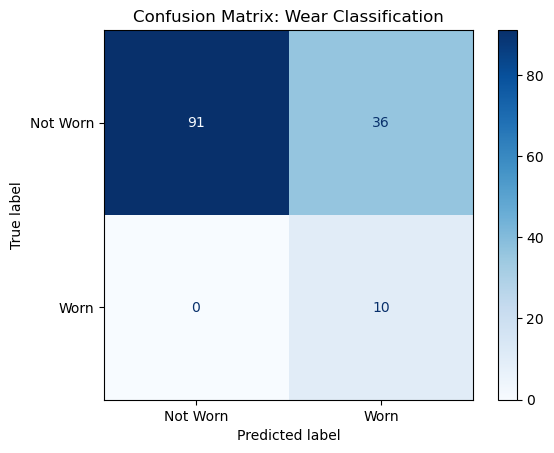

{4: 'Not Worn',
 6: 'Not Worn',
 18: 'Not Worn',
 19: 'Not Worn',
 20: 'Not Worn',
 21: 'Not Worn',
 22: 'Not Worn',
 24: 'Not Worn',
 33: 'Not Worn',
 34: 'Not Worn',
 35: 'Not Worn',
 36: 'Not Worn',
 37: 'Not Worn',
 46: 'Not Worn',
 47: 'Not Worn',
 48: 'Not Worn',
 54: 'Not Worn',
 55: 'Not Worn',
 56: 'Not Worn',
 63: 'Not Worn',
 64: 'Not Worn',
 65: 'Not Worn',
 73: 'Not Worn',
 74: 'Not Worn',
 75: 'Not Worn',
 76: 'Not Worn',
 77: 'Not Worn',
 79: 'Not Worn',
 80: 'Not Worn',
 81: 'Not Worn',
 82: 'Not Worn',
 96: 'Not Worn',
 97: 'Not Worn',
 99: 'Not Worn',
 100: 'Not Worn',
 101: 'Not Worn',
 111: 'Not Worn',
 118: 'Not Worn',
 119: 'Not Worn',
 126: 'Not Worn',
 133: 'Not Worn',
 134: 'Not Worn',
 135: 'Not Worn',
 147: 'Not Worn',
 148: 'Not Worn',
 156: 'Worn',
 7: 'Not Worn',
 8: 'Not Worn',
 9: 'Worn',
 10: 'Worn',
 11: 'Worn',
 12: 'Worn',
 25: 'Not Worn',
 26: 'Not Worn',
 27: 'Not Worn',
 28: 'Worn',
 38: 'Not Worn',
 39: 'Not Worn',
 40: 'Not Worn',
 41: 'Not Worn

In [ ]:
import sklearn
# Define label categories
worn_labels = {"Heavy", "Severe", "Failure"}

# Create a dictionary of true labels
true_labels = {}
for category, cases in label_dict.items():
    for case in cases:
        true_labels[case] = "Worn" if category in worn_labels else "Not Worn"
        # This code is correct
        print(case)
        print(category in worn_labels)


predicted_labels = {}
for case in grouped_by_case:
    predicted_labels[case] = classification_policy(case, band_ratios_df, stats_df_clean)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Align true and predicted values
common_cases = sorted(set(true_labels.keys()) & set(predicted_labels.keys()))
y_true = [true_labels[case] for case in common_cases]
y_pred = [predicted_labels[case] for case in common_cases]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["Not Worn", "Worn"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Worn", "Worn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Wear Classification")
plt.grid(False)
plt.show()

predicted_labels


In [ ]:
pd.set_option('display.max_columns', None)

pd.DataFrame([y_true, y_pred])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136
0,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Worn,Worn,Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn
1,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Worn,Worn,Worn,Worn,Worn,Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Worn,Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Worn,Not Worn,Worn,Not Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Worn,Not Worn,Worn,Worn,Not Worn,Not Worn,Not Worn,Worn,Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Not Worn,Worn,Worn,Worn,Worn,Worn,Worn,Not Worn,Not Worn,Not Worn,Worn,Worn,Worn,Worn,Worn,Worn,Worn,Worn,Not Worn,Worn,Worn,Worn,Not Worn


In [ ]:
label_dict

{'Good': Index([  4,   6,  18,  19,  20,  21,  22,  24,  33,  34,  35,  36,  37,  46,
         47,  48,  54,  55,  56,  63,  64,  65,  73,  74,  75,  76,  77,  79,
         80,  81,  82,  96,  97,  99, 100, 101, 111, 118, 119, 126, 133, 134,
        135, 147, 148, 156],
       dtype='int64'),
 'Slight': Index([  7,   8,   9,  10,  11,  12,  25,  26,  27,  28,  38,  39,  40,  41,
         42,  43,  49,  50,  51,  57,  58,  66,  67,  83,  84,  86,  87, 102,
        103, 105, 112, 120, 121, 122, 127, 136, 137, 149, 151, 157, 158, 164,
        166],
       dtype='int64'),
 'Average': Index([ 13,  14,  15,  17,  29,  30,  31,  44,  45,  52,  59,  60,  68,  69,
         70,  71,  89,  90,  91,  92,  93, 106, 107, 108, 109, 113, 114, 123,
        129, 130, 138, 139, 140, 152, 159, 160, 161, 167],
       dtype='int64'),
 'Heavy': Index([61, 94, 115, 141, 142, 153], dtype='int64'),
 'Severe': Index([143, 144, 154], dtype='int64'),
 'Failure': Index([145], dtype='int64')}

In [ ]:
# Cases to check
cases_to_check = [94]
stats_df_clean[(stats_df_clean["case_number"] == 94)]

,case_number,label,sensor_type,band,mean,std,skew
226,94,Heavy,AE_table,high,1.871049e-03,1.648426e-04,-2.073909e-15
341,94,Heavy,smcAC,high,3.515490e-02,1.657812e-02,-6.506727e-16
456,94,Heavy,smcDC,high,4.644795e-08,1.634683e-08,0.000000e+00
572,94,Heavy,vib_spindle,high,1.087344e-03,8.080364e-04,9.799132e-17
698,94,Heavy,vib_table,high,1.167064e-03,4.076579e-04,0.000000e+00
1080,94,Heavy,smcAC,low,1.227515e-01,6.891563e-02,3.312509e-16
1317,94,Heavy,vib_spindle,low,2.005879e+00,3.327223e-03,0.000000e+00
1442,94,Heavy,vib_table,low,2.131457e+00,1.403386e-01,2.353584e-15
1668,94,Heavy,AE_table,mid,1.224077e-02,7.850233e-04,0.000000e+00
1778,94,Heavy,smcAC,mid,3.477920e-02,1.240428e-02,-3.328484e-16


In [ ]:
stats_df_clean[stats_df_clean["case_number"] == 94]["sensor_type"]

226        AE_table
341           smcAC
456           smcDC
572     vib_spindle
698       vib_table
1080          smcAC
1317    vib_spindle
1442      vib_table
1668       AE_table
1778          smcAC
1884          smcDC
2114      vib_table
Name: sensor_type, dtype: object

In [ ]:
"AE_spindle" in stats_df_clean[stats_df_clean["case_number"] == 94]["sensor_type"].values

False

In [ ]:
band_ratios_df

,smcAC_case004,smcAC_case006,smcAC_case018,smcAC_case019,smcAC_case020,smcAC_case021,smcAC_case022,smcAC_case024,smcAC_case033,smcAC_case034,smcAC_case035,smcAC_case036,smcAC_case037,smcAC_case046,smcAC_case047,smcAC_case048,smcAC_case054,smcAC_case055,smcAC_case056,smcAC_case063,smcAC_case064,smcAC_case065,smcAC_case073,smcAC_case074,smcAC_case075,smcAC_case076,smcAC_case077,smcAC_case079,smcAC_case080,smcAC_case081,smcAC_case082,smcAC_case096,smcAC_case097,smcAC_case099,smcAC_case100,smcAC_case101,smcAC_case111,smcAC_case118,smcAC_case119,smcAC_case126,smcAC_case133,smcAC_case134,smcAC_case135,smcAC_case147,smcAC_case148,smcAC_case156,smcAC_case007,smcAC_case008,smcAC_case009,smcAC_case010,smcAC_case011,smcAC_case012,smcAC_case025,smcAC_case026,smcAC_case027,smcAC_case028,smcAC_case038,smcAC_case039,smcAC_case040,smcAC_case041,smcAC_case042,smcAC_case043,smcAC_case049,smcAC_case050,smcAC_case051,smcAC_case057,smcAC_case058,smcAC_case066,smcAC_case067,smcAC_case083,smcAC_case084,smcAC_case086,smcAC_case087,smcAC_case102,smcAC_case103,smcAC_case105,smcAC_case112,smcAC_case120,smcAC_case121,smcAC_case122,smcAC_case127,smcAC_case136,smcAC_case137,smcAC_case149,smcAC_case151,smcAC_case157,smcAC_case158,smcAC_case164,smcAC_case166,smcAC_case013,smcAC_case014,smcAC_case015,smcAC_case017,smcAC_case029,smcAC_case030,smcAC_case031,smcAC_case044,smcAC_case045,smcAC_case052,smcAC_case059,smcAC_case060,smcAC_case068,smcAC_case069,smcAC_case070,smcAC_case071,smcAC_case089,smcAC_case090,smcAC_case091,smcAC_case092,smcAC_case093,smcAC_case106,smcAC_case107,smcAC_case108,smcAC_case109,smcAC_case113,smcAC_case114,smcAC_case123,smcAC_case129,smcAC_case130,smcAC_case138,smcAC_case139,smcAC_case140,smcAC_case152,smcAC_case159,smcAC_case160,smcAC_case161,smcAC_case167,smcAC_case061,smcAC_case094,smcAC_case115,smcAC_case141,smcAC_case142,smcAC_case153,smcAC_case143,smcAC_case144,smcAC_case154,smcAC_case145,smcDC_case004,smcDC_case006,smcDC_case018,smcDC_case019,smcDC_case020,smcDC_case021,smcDC_case022,smcDC_case024,smcDC_case033,smcDC_case034,smcDC_case035,smcDC_case036,smcDC_case037,smcDC_case046,smcDC_case047,smcDC_case048,smcDC_case054,smcDC_case055,smcDC_case056,smcDC_case063,smcDC_case064,smcDC_case065,smcDC_case073,smcDC_case074,smcDC_case075,smcDC_case076,smcDC_case077,smcDC_case079,smcDC_case080,smcDC_case081,smcDC_case082,smcDC_case096,smcDC_case097,smcDC_case099,smcDC_case100,smcDC_case101,smcDC_case111,smcDC_case118,smcDC_case119,smcDC_case126,smcDC_case133,smcDC_case134,smcDC_case135,smcDC_case147,smcDC_case148,smcDC_case156,smcDC_case007,smcDC_case008,smcDC_case009,smcDC_case010,smcDC_case011,smcDC_case012,smcDC_case025,smcDC_case026,smcDC_case027,smcDC_case028,smcDC_case038,smcDC_case039,smcDC_case040,smcDC_case041,smcDC_case042,smcDC_case043,smcDC_case049,smcDC_case050,smcDC_case051,smcDC_case057,smcDC_case058,smcDC_case066,smcDC_case067,smcDC_case083,smcDC_case084,smcDC_case086,smcDC_case087,smcDC_case102,smcDC_case103,smcDC_case105,smcDC_case112,smcDC_case120,smcDC_case121,smcDC_case122,smcDC_case127,smcDC_case136,smcDC_case137,smcDC_case149,smcDC_case151,smcDC_case157,smcDC_case158,smcDC_case164,smcDC_case166,smcDC_case013,smcDC_case014,smcDC_case015,smcDC_case017,smcDC_case029,smcDC_case030,smcDC_case031,smcDC_case044,smcDC_case045,smcDC_case052,smcDC_case059,smcDC_case060,smcDC_case068,smcDC_case069,smcDC_case070,smcDC_case071,smcDC_case089,smcDC_case090,smcDC_case091,smcDC_case092,smcDC_case093,smcDC_case106,smcDC_case107,smcDC_case108,smcDC_case109,smcDC_case113,smcDC_case114,smcDC_case123,smcDC_case129,smcDC_case130,smcDC_case138,smcDC_case139,smcDC_case140,smcDC_case152,smcDC_case159,smcDC_case160,smcDC_case161,smcDC_case167,smcDC_case061,smcDC_case094,smcDC_case115,smcDC_case141,smcDC_case142,smcDC_case153,smcDC_case143,smcDC_case144,smcDC_case154,smcDC_case145,vib_table_case004,vib_table_case006,vib_table_case018,vib_table_case019,vib_table_case020,vib_table_case021,vib_table_case022,vib_table_case024,vib_table_case033,v

In [ ]:
# pd.set_option("display.max_rows", None)
# stats_df_clean